**LIGHTHOUSE | Terceira etapa do processo seletivo - Relatório Referente ao Desafio técnico**
---

---





**INTRODUÇÃO**
---



**SUMÁRIO**

---



O notebook está subdivido entre:
1. Análise Exploratória de Dados (EDA) - Tratamento e Visualização de Dados
2. Testes de Hipótese - Validação de Hipóteses Levantadas após Tratamento
3. Conclusões - Respostas para as perguntas levantadas no Desafio
4. Modelo de Machine Learning Random Forest (RF) - Para fins de testes
5. Modelo de Machine Learning Regressão Linear (RL) - Para fins comparativos


**CONSIDERAÇÕES INICIAIS**

---


Essa é a minha primeira vez realizando uma Análise Exploratória de Dados em Python. Até o dado momento possuía conhecimento, quase que exclusivamente, teórico sobre o assunto.
Como ainda estou em processo de aprendizagem constante, é bastante provável que a Análise não foi realizada na forma mais otimizada possível.
Contudo, me esforcei ao máximo para tentar entregar resultados minimamente decentes a respeito do Desafio.

Outro ponto importante a se ressaltar, é que essa também é minha primeira vez aplicando conceitos de Machine Learning em um projeto.
Por não ter experiência, tive que ir atrás de conteúdo teórico a respeito de algebra linear e modelos de regressão, o que me custou alguns dias a mais para a realização do projeto.
Outro ponto é que eu já possuia pronto um modelo de regressão linear, que realizava previsão de dados contidos em listas simples, ao qual eu usei como base para meus estudos.

A lógica empregada no código do modelo utilizado no desafio foram inspirados principalmente nesse modelo de regressão linear, com adaptações claras para se adequar ao requisitado.
As adaptações partiram de conceitos teóricos de algebra linear, e de projetos práticos encontrados no Kaggle, a fim de otimizar o modelo.

**IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS NA EDA**


---





In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTANDO O DATAFRAME**




In [14]:
df_price = pd.read_csv("/content/drive/MyDrive/Projetos de Dados/teste_indicium_precificacao.csv")

**VISÃO GERAL DO DATAFRAME**



In [15]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 



---



**ANÁLISE RÁPIDA: Presença de valores nulos e zeros**



In [16]:
df_price.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6




---



**IDENTIFICANDO E QUANTIFICANDO COLUNAS COM VALORES NULOS E ZEROS**


In [17]:
df_price.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [18]:
(df_price == 0).sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,11




---



**GRÁFICOS PARA ANÁLISE INICIAL**



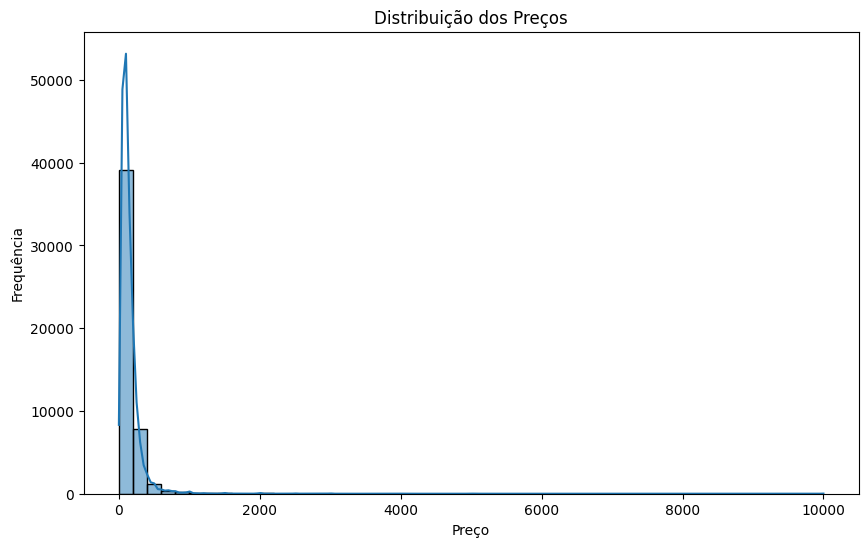

In [19]:
# Visualização da distribuição dos preços

plt.figure(figsize=(10, 6))
sns.histplot(df_price["price"], bins=50, kde=True)
plt.title("Distribuição dos Preços")

plt.xlabel("Preço")
plt.ylabel("Frequência")

plt.show()

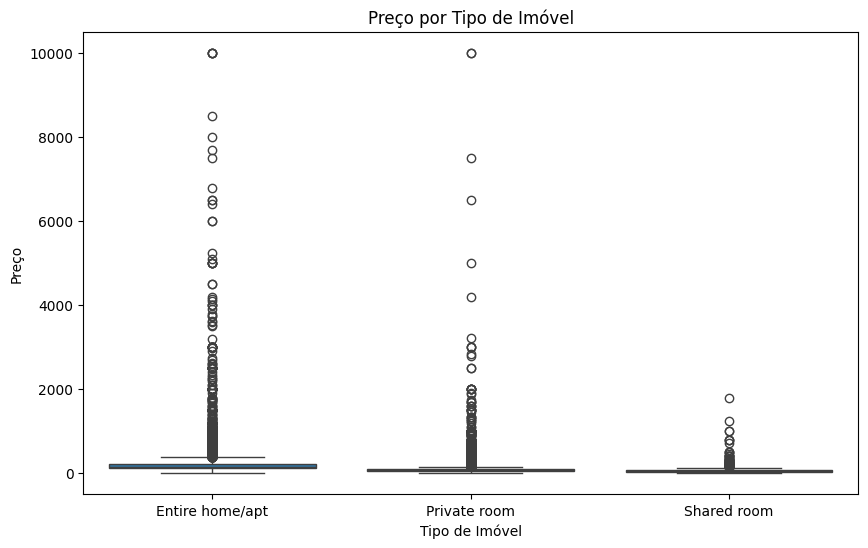

In [20]:
# Boxplot de preços por tipo de quarto

plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type", y="price", data=df_price)
plt.title("Preço por Tipo de Imóvel")

plt.xlabel("Tipo de Imóvel")
plt.ylabel("Preço")

plt.show()

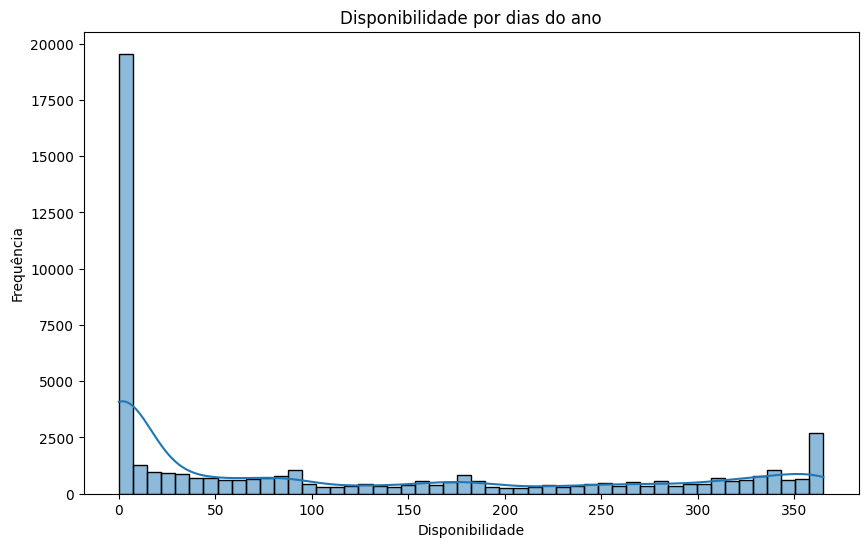

In [21]:
# Visualização da distribuição da Disponibilidade

plt.figure(figsize=(10, 6))
sns.histplot(df_price["disponibilidade_365"], bins=50, kde=True)
plt.title("Disponibilidade por dias do ano")

plt.xlabel("Disponibilidade")
plt.ylabel("Frequência")

plt.show()

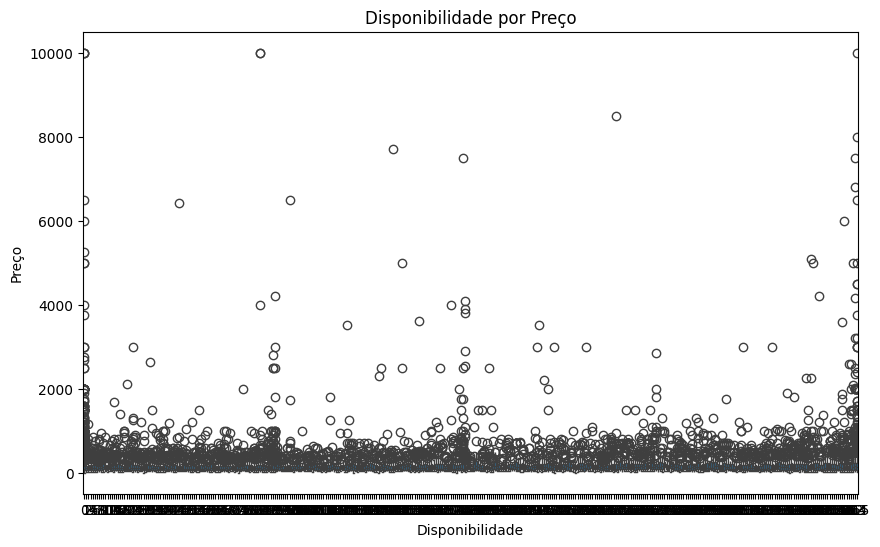

In [22]:
# Boxplot da distribuição da disponibilidade por preços de quarto

plt.figure(figsize=(10, 6))
sns.boxplot(x="disponibilidade_365", y="price", data=df_price)
plt.title("Disponibilidade por Preço")

plt.xlabel("Disponibilidade")
plt.ylabel("Preço")

plt.show()

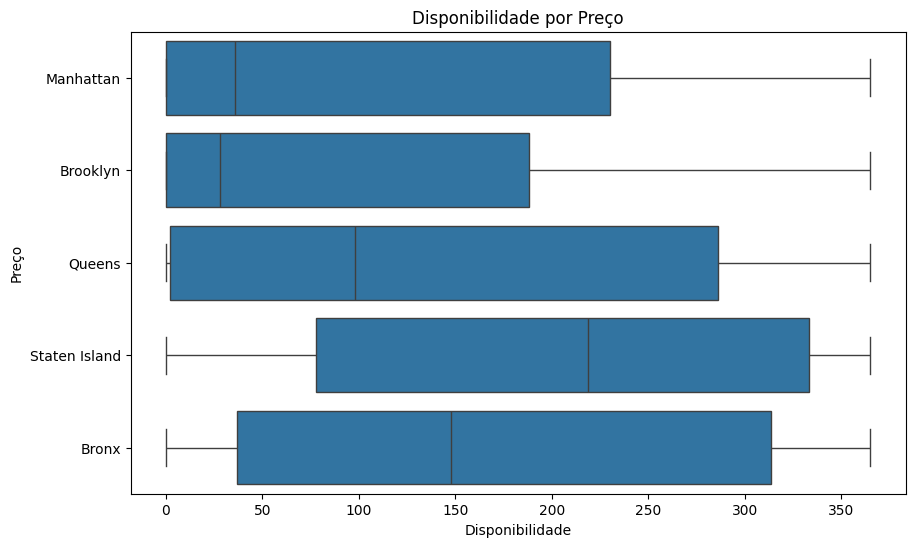

In [23]:
# Boxplot da disponibilidade por bairros

plt.figure(figsize=(10, 6))
sns.boxplot(x="disponibilidade_365", y="bairro_group", data=df_price)
plt.title("Disponibilidade por Preço")

plt.xlabel("Disponibilidade")
plt.ylabel("Preço")

plt.show()



---



**EXCLUINDO COLUNAS IRRELEVANTES PARA A ANÁLISE: De tabela exclusão de alguns valores nulos**





In [24]:
df_price = df_price.drop(["id", "nome", "host_id", "host_name", "latitude", "longitude", "ultima_review"], axis=1)

In [25]:
df_price.head(10)

,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
1,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
2,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
3,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
4,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
5,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0
6,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220
7,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0
8,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,188
9,Manhattan,Upper West Side,Entire home/apt,135,5,53,0.43,1,6




---



**IDENTIFICANDO PRESENÇA DE OUTLIERS PELOS DADOS ESTATÍSTICOS**




In [26]:
df_price.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000




---



**SUBSTITUINDO VALORES ZERO POR NULL PARA PREENCHER COM A MEDIANA**




In [27]:
df_price["price"] = df_price["price"].replace(0, np.nan)
df_price["numero_de_reviews"] = df_price["numero_de_reviews"].replace(0, np.nan)
df_price["disponibilidade_365"] = df_price["disponibilidade_365"].replace(0, np.nan)

In [28]:
df_price.fillna(df_price.select_dtypes(include="number").median(), inplace=True)

**FAZENDO UM TRATAMENTO ESPECÍFICO PARA A COLUNA DE REVIEWS POR MÊS PARA EVITAR
ERROS NO DESCRIBE**



In [29]:
df_price["reviews_por_mes"] = df_price["reviews_por_mes"].round(2)
df_price = df_price[df_price["reviews_por_mes"] >= 1]

**CONFERINDO AS MUDANÇAS**





In [30]:
df_price.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,16801.000000,16801.000000,16801.000000,16801.000000,16801.000000,16801.000000
mean,138.151062,3.244509,55.579430,2.757474,5.539373,164.472174
std,143.783673,10.365349,62.887665,1.748848,32.521574,112.733273
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67.000000,1.000000,11.000000,1.520000,1.000000,62.000000
50%,100.000000,2.000000,34.000000,2.320000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,263.000000
max,7500.000000,999.000000,629.000000,58.500000,327.000000,365.000000


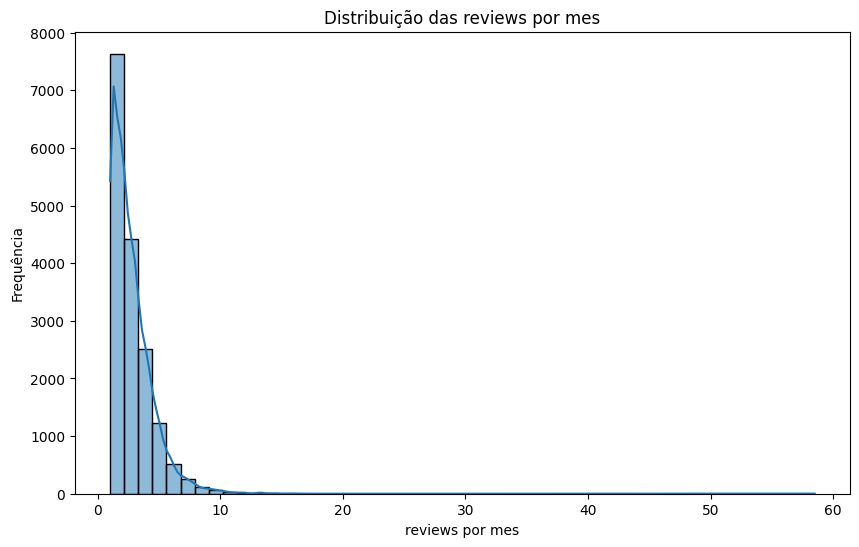

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_price["reviews_por_mes"], bins=50, kde=True)
plt.title("Distribuição das reviews por mes")

plt.xlabel("reviews por mes")
plt.ylabel("Frequência")

plt.show()



---



**QUANTIFICANDO E FILTRANDO OS OUTLIERS POR INTERVALO INTERQUARTIL**



In [33]:
# Função para corrigir outliers por IQR
def corrige_outliers(df_price):
    for col in df_price.select_dtypes(include=["float64", "int64"]).columns:

        Q1 = df_price[col].quantile(0.25)
        Q3 = df_price[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definindo limites
        lower_limit = Q1 - (IQR * 1.5)
        upper_limit = Q3 + (IQR * 1.5)

        # Substituir outliers pelos valores dos quartis Q1 e Q3
        df_price[col] = df_price[col].apply(lambda x: Q1 if x < lower_limit else (Q3 if x > upper_limit else x))

    return df_price

In [34]:
# Aplicando a correção
df_filter = corrige_outliers(df_price)

In [35]:
df_filter.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,16801.000000,16801.000000,16801.000000,16801.000000,16801.000000,16801.000000
mean,119.312243,2.180823,46.915541,2.586218,1.504018,164.472174
std,64.748666,1.127541,42.629850,1.273460,0.653379,112.733273
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67.000000,1.000000,11.000000,1.520000,1.000000,62.000000
50%,100.000000,2.000000,34.000000,2.320000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,263.000000
max,322.000000,6.000000,178.000000,6.470000,3.000000,365.000000




---



**CORREÇÃO DE VALORES DE PREÇO FORA DO ESCOPO**



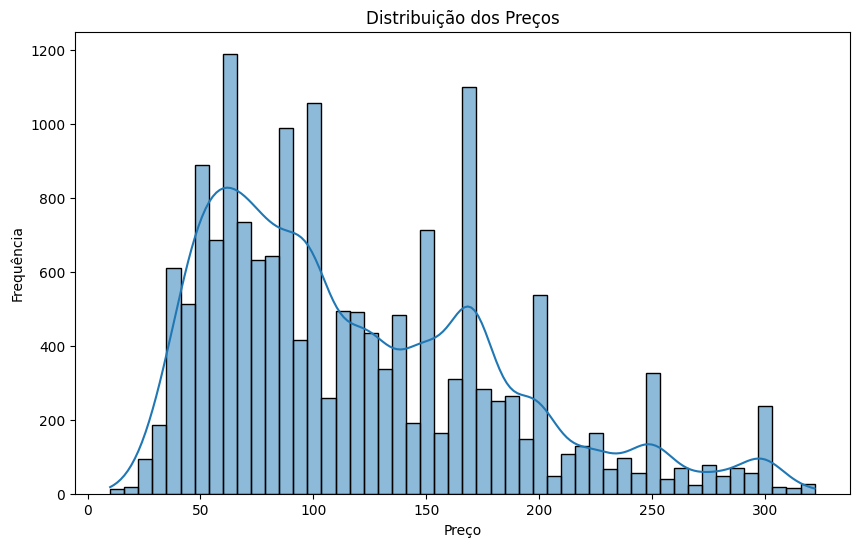

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filter["price"], bins=50, kde=True)
plt.title("Distribuição dos Preços")

plt.xlabel("Preço")
plt.ylabel("Frequência")

plt.show()

In [37]:
df_price_filter = df_filter[(df_filter['price'] >= 25) & (df_filter['price'] <= 322)]

In [38]:
df_price_filter.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,16761.000000,16761.000000,16761.000000,16761.000000,16761.000000,16761.000000
mean,119.552712,2.182030,46.959489,2.587526,1.503669,164.487620
std,64.637863,1.127219,42.642907,1.273583,0.653247,112.726016
min,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67.000000,1.000000,11.000000,1.520000,1.000000,62.000000
50%,100.000000,2.000000,34.000000,2.330000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,263.000000
max,322.000000,6.000000,178.000000,6.470000,3.000000,365.000000


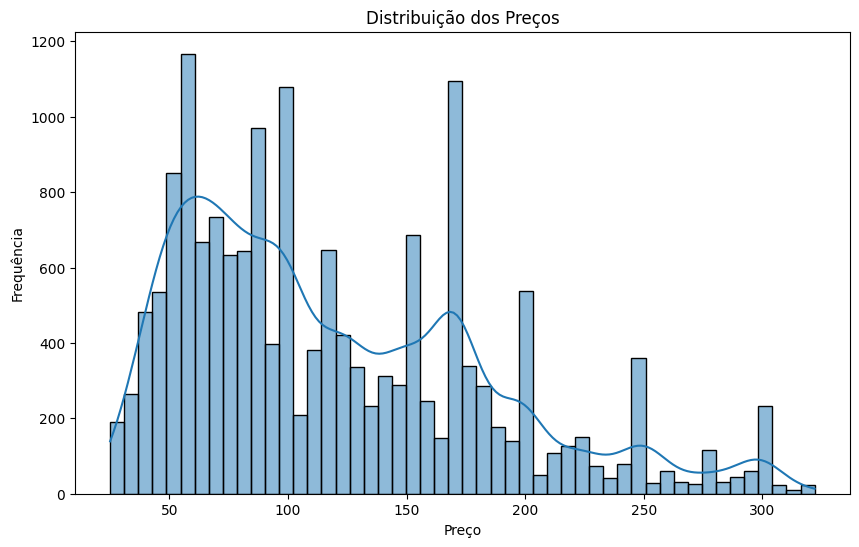

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df_price_filter["price"], bins=50, kde=True)
plt.title("Distribuição dos Preços")

plt.xlabel("Preço")
plt.ylabel("Frequência")

plt.show()



---



**TENTATIVA DE CORREÇÃO NA DISPONIBILIDADE**


In [40]:
df_filtered = df_price_filter.copy()
df_filtered = df_filtered[(df_filtered['disponibilidade_365'] >= 30)]

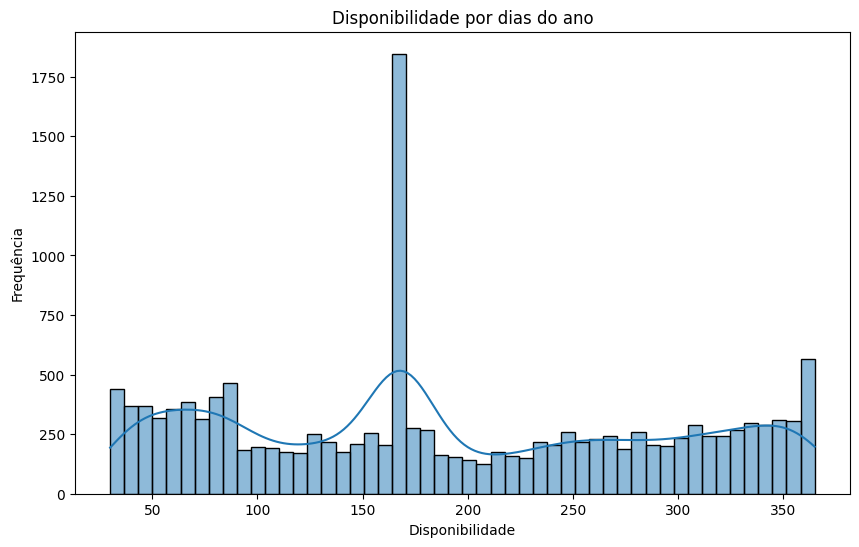

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["disponibilidade_365"], bins=50, kde=True)
plt.title("Disponibilidade por dias do ano")

plt.xlabel("Disponibilidade")
plt.ylabel("Frequência")

plt.show()

In [42]:
df_filtered.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,14360.000000,14360.000000,14360.000000,14360.000000,14360.000000,14360.000000
mean,120.449930,2.163092,48.304735,2.601370,1.529318,189.861003
std,65.392258,1.123852,43.098406,1.265243,0.658144,101.611488
min,25.000000,1.000000,1.000000,1.000000,1.000000,30.000000
25%,67.000000,1.000000,11.000000,1.540000,1.000000,96.000000
50%,100.000000,2.000000,36.000000,2.350000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,281.000000
max,322.000000,6.000000,178.000000,6.470000,3.000000,365.000000




---



**PROCURANDO UMA CORRELAÇÃO QUE ESTÁ ALTERANDO O DESVIO PADRÃO DA
DISPONIBILIDADE**





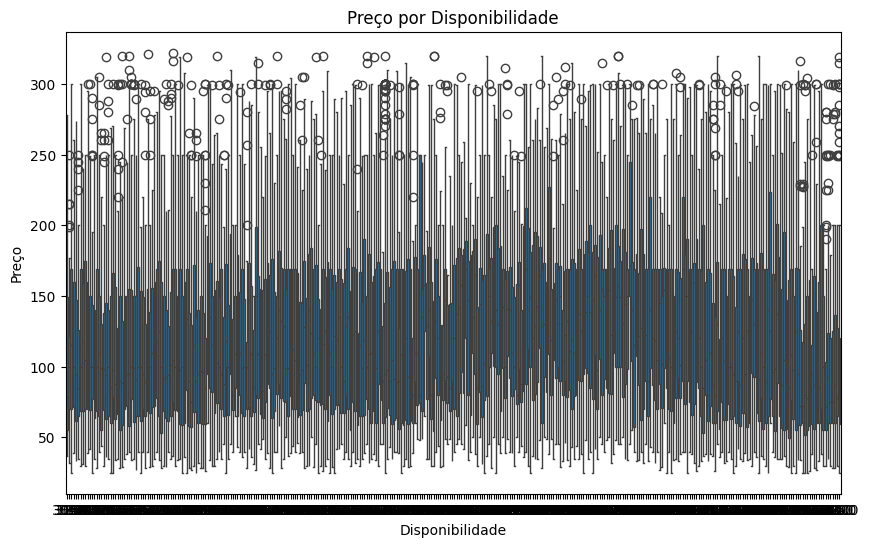

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="disponibilidade_365", y="price", data=df_filtered)
plt.title("Preço por Disponibilidade")

plt.xlabel("Disponibilidade")
plt.ylabel("Preço")

plt.show()

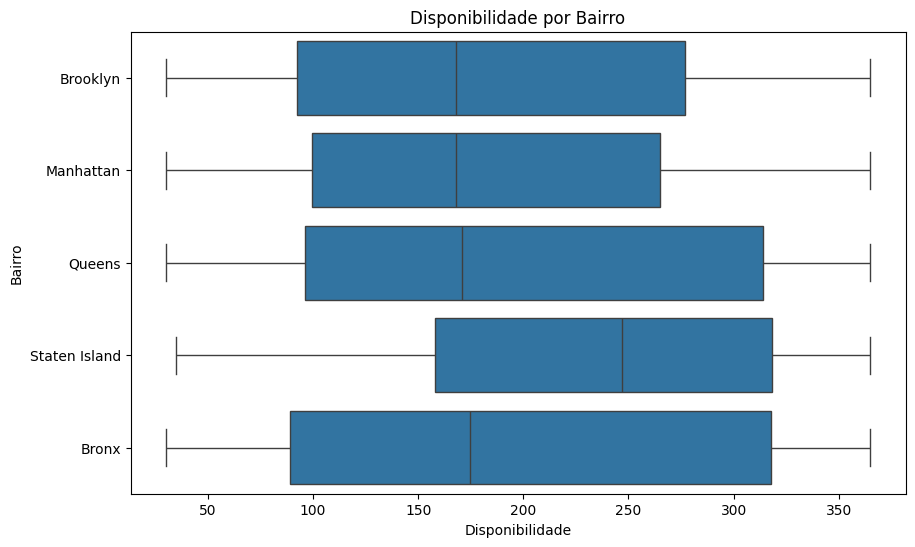

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="disponibilidade_365", y="bairro_group", data=df_filtered)
plt.title("Disponibilidade por Bairro")

plt.xlabel("Disponibilidade")
plt.ylabel("Bairro")

plt.show()

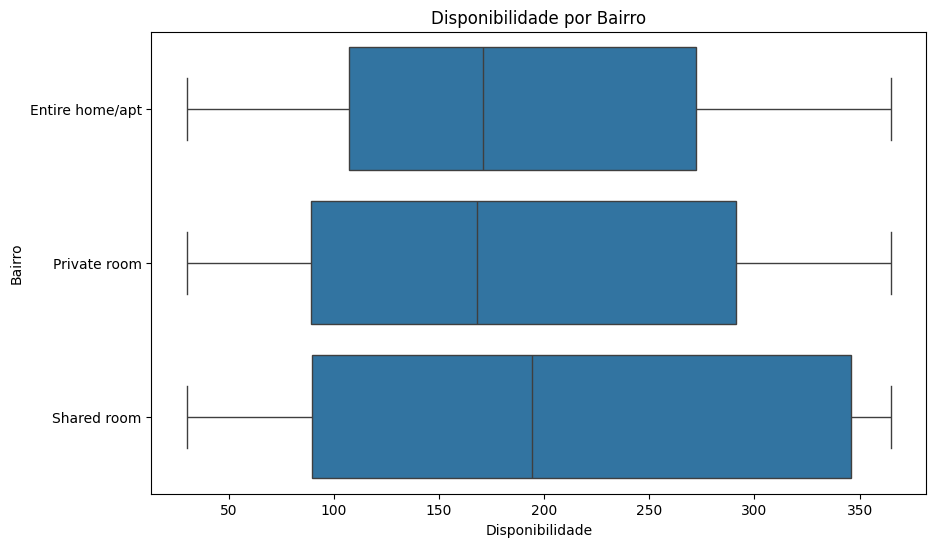

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="disponibilidade_365", y="room_type", data=df_filtered)
plt.title("Disponibilidade por Bairro")

plt.xlabel("Disponibilidade")
plt.ylabel("Bairro")

plt.show()



---



**PROCURANDO UMA CORRELAÇÃO QUE ESTÁ ALTERANDO O DESVIO PADRÃO DO PREÇO**



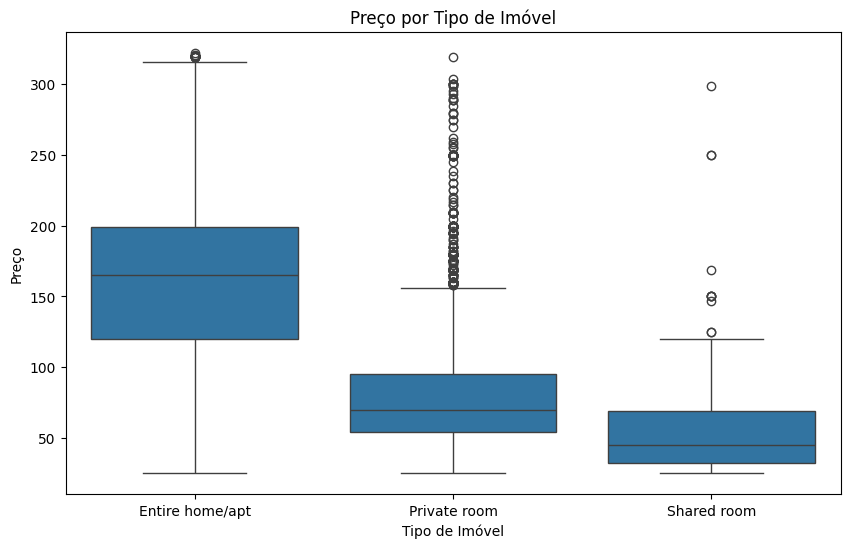

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type", y="price", data=df_filtered)
plt.title("Preço por Tipo de Imóvel")

plt.xlabel("Tipo de Imóvel")
plt.ylabel("Preço")

plt.show()

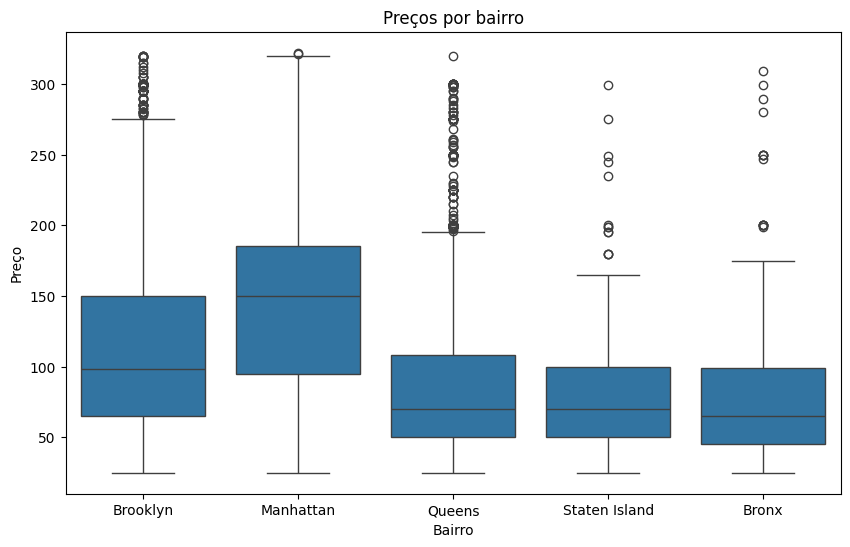

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="bairro_group", y="price", data=df_filtered)
plt.title("Preços por bairro")

plt.xlabel("Bairro")
plt.ylabel("Preço")

plt.show()



---



**SEGUNDA FILTRAGEM DE VALORES CONSIDERADOS ANORMAIS**



In [48]:
df_filtered.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,14360.000000,14360.000000,14360.000000,14360.000000,14360.000000,14360.000000
mean,120.449930,2.163092,48.304735,2.601370,1.529318,189.861003
std,65.392258,1.123852,43.098406,1.265243,0.658144,101.611488
min,25.000000,1.000000,1.000000,1.000000,1.000000,30.000000
25%,67.000000,1.000000,11.000000,1.540000,1.000000,96.000000
50%,100.000000,2.000000,36.000000,2.350000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,281.000000
max,322.000000,6.000000,178.000000,6.470000,3.000000,365.000000


In [49]:
col_outliers = ["price", "numero_de_reviews", "disponibilidade_365"]
df_filtered2 = df_filtered.copy()

In [50]:
def cortar_percentis(df_filtered2, col, lower=0.25, upper=0.75):
    limite_inferior = df_filtered[col].quantile(lower)
    limite_superior = df_filtered[col].quantile(upper)
    df_filtered2 = df_filtered[(df_filtered[col] >= limite_inferior) & (df_filtered[col] <= limite_superior)]
    return df_filtered2

for col in col_outliers:
    df_filtered2 = cortar_percentis(df_filtered2, col)

In [51]:
df_filtered2.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000
mean,124.491846,2.226783,50.873687,2.619800,1.488115,184.492123
std,65.116427,1.144492,43.871198,1.264725,0.643072,48.839656
min,25.000000,1.000000,1.000000,1.000000,1.000000,96.000000
25%,70.000000,1.000000,13.000000,1.550000,1.000000,156.000000
50%,110.000000,2.000000,39.000000,2.380000,1.000000,168.000000
75%,169.000000,3.000000,78.000000,3.500000,2.000000,226.000000
max,320.000000,6.000000,178.000000,6.470000,3.000000,281.000000




---



**CONFERINDO O COEFICIENTE DE VARIAÇÃO DAS COLUNAS COM DESVIO PADRÃO ALTO**



In [52]:
# Média e desvio padrão da tabela price
mean = np.mean(df_filtered2["price"])
std = np.std(df_filtered2["price"])

# Coeficiente de Variação (em %)
cv = (std / mean) * 100

print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Média: 124.49
Desvio Padrão: 65.11
Coeficiente de Variação (CV): 52.30%


In [53]:
# Média e desvio padrão da tabela numero_de_reviews
mean = np.mean(df_filtered2["numero_de_reviews"])
std = np.std(df_filtered2["numero_de_reviews"])

# Coeficiente de Variação (em %)
cv = (std / mean) * 100

print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Média: 50.87
Desvio Padrão: 43.87
Coeficiente de Variação (CV): 86.23%


In [54]:
# Média e desvio padrão da tabela disponibilidade_365
mean = np.mean(df_filtered2["disponibilidade_365"])
std = np.std(df_filtered2["disponibilidade_365"])

# Coeficiente de Variação (em %)
cv = (std / mean) * 100

print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Média: 184.49
Desvio Padrão: 48.84
Coeficiente de Variação (CV): 26.47%


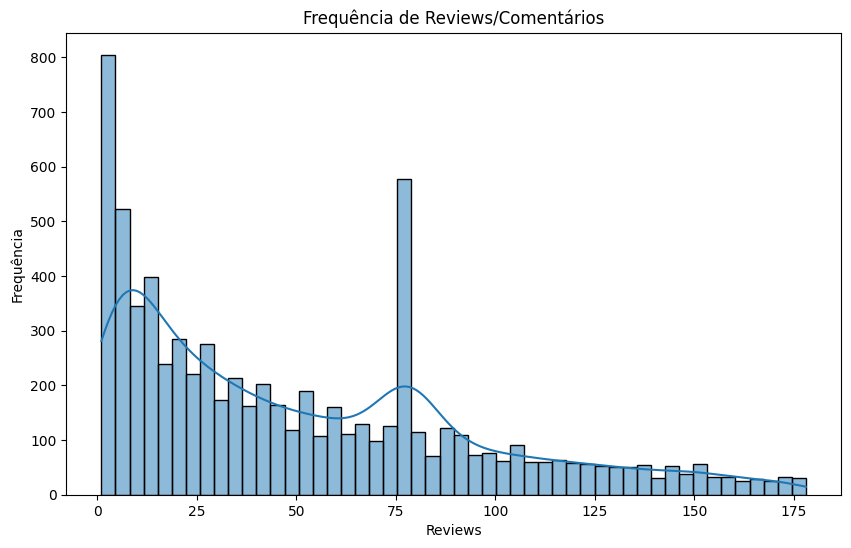

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered2["numero_de_reviews"], bins=50, kde=True)
plt.title("Frequência de Reviews/Comentários")

plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.show()



---



**PEQUENA CORREÇÃO NOS VALORES DA COLUNA DE NUMERO DE REVIEWS**




In [56]:
df_filter_review = df_filtered2.copy()
df_filter_review = df_filtered2[(df_filtered2["numero_de_reviews"] >= 20)]

In [57]:
df_filter_review.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,122.071296,2.233670,71.819081,2.788098,1.505667,187.589120
std,62.659645,1.138314,39.025736,1.247826,0.651128,50.478128
min,25.000000,1.000000,20.000000,1.000000,1.000000,96.000000
25%,71.000000,1.000000,39.000000,1.730000,1.000000,156.000000
50%,109.000000,2.000000,68.000000,2.630000,1.000000,168.000000
75%,169.000000,3.000000,93.000000,3.550000,2.000000,234.000000
max,320.000000,6.000000,178.000000,6.470000,3.000000,281.000000


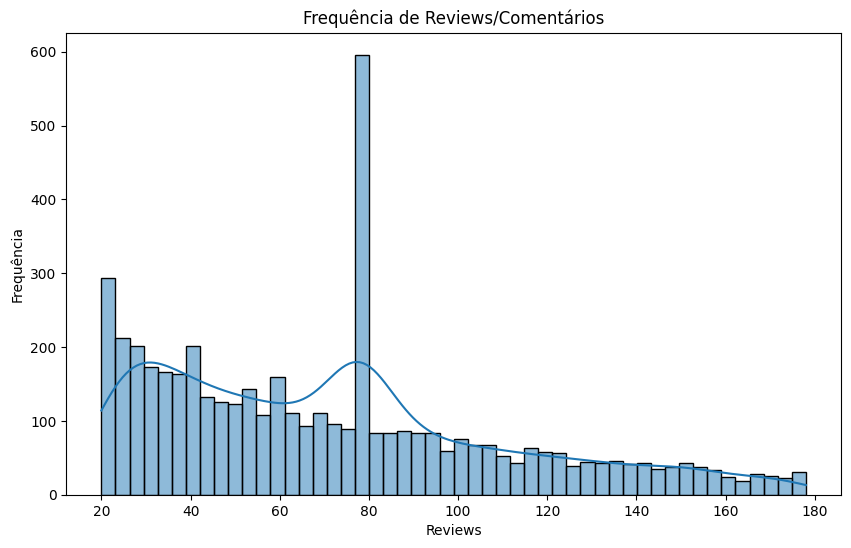

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filter_review["numero_de_reviews"], bins=50, kde=True)
plt.title("Frequência de Reviews/Comentários")

plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.show()



---



**CONFERINDO O COEFICIENTE DE VARIAÇÃO NOVAMENTE**



In [59]:
mean = np.mean(df_filter_review["numero_de_reviews"])
std = np.std(df_filter_review["numero_de_reviews"])

cv = (std / mean) * 100

print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Média: 71.82
Desvio Padrão: 39.02
Coeficiente de Variação (CV): 54.33%


In [60]:
mean = np.mean(df_filter_review["price"])
std = np.std(df_filter_review["price"])

cv = (std / mean) * 100

print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Média: 122.07
Desvio Padrão: 62.65
Coeficiente de Variação (CV): 51.33%




---



**DADOS APRESENTAM UMA VARIABILIDADE QUE DEPENDENDO DO CONTEXTO PODE SER
CONSIDERADA NATURAL**


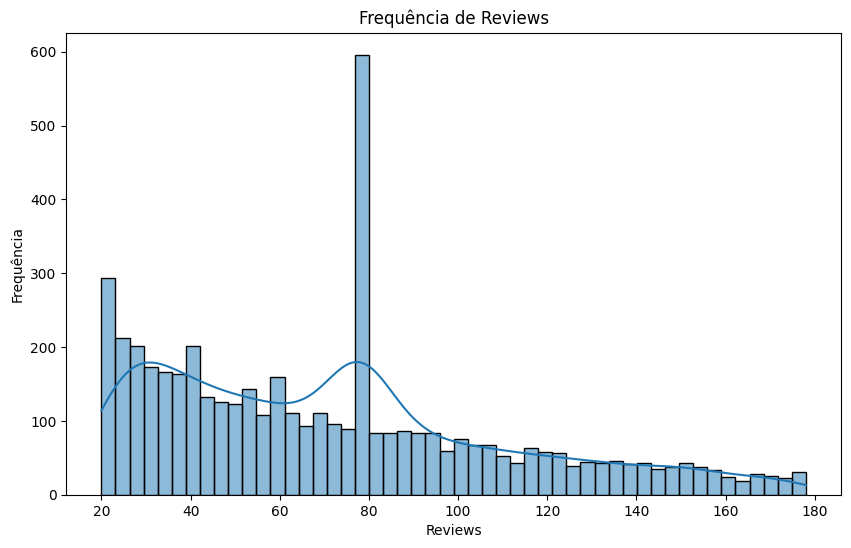

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filter_review["numero_de_reviews"], bins=50, kde=True)
plt.title("Frequência de Reviews")

plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.show()

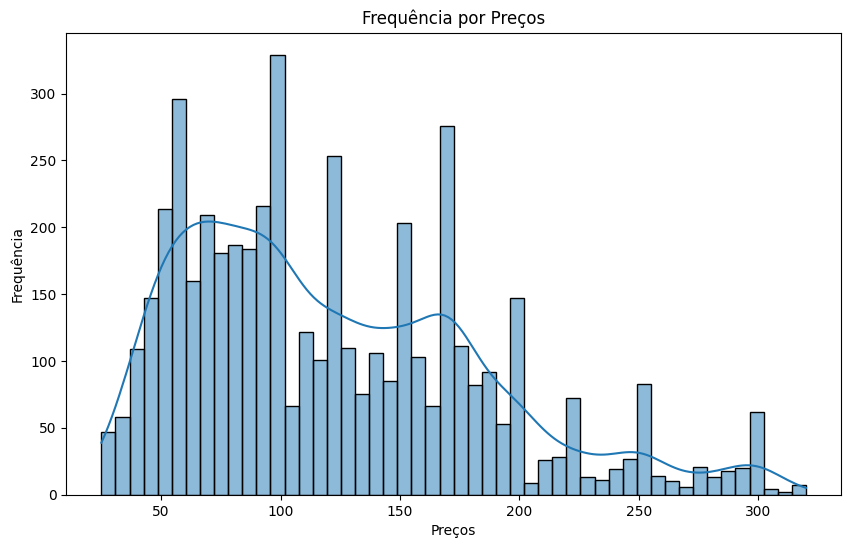

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filter_review["price"], bins=50, kde=True)
plt.title("Frequência por Preços")

plt.xlabel("Preços")
plt.ylabel("Frequência")

plt.show()



---



**ULTIMA CHECAGEM ESTATÍSTICA ANTES DA FORMULAÇÃO DE HIPÓTESES**





In [63]:
df_filtered_final = df_filter_review.copy()

In [64]:
df_filtered_final.describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,122.071296,2.233670,71.819081,2.788098,1.505667,187.589120
std,62.659645,1.138314,39.025736,1.247826,0.651128,50.478128
min,25.000000,1.000000,20.000000,1.000000,1.000000,96.000000
25%,71.000000,1.000000,39.000000,1.730000,1.000000,156.000000
50%,109.000000,2.000000,68.000000,2.630000,1.000000,168.000000
75%,169.000000,3.000000,93.000000,3.550000,2.000000,234.000000
max,320.000000,6.000000,178.000000,6.470000,3.000000,281.000000


In [65]:
df_filtered_final.head(10)

,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
2,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,78.0,4.64,1.0,194.0
6,Manhattan,Hell's Kitchen,Private room,79.0,2.0,78.0,3.47,1.0,220.0
8,Manhattan,Chinatown,Entire home/apt,150.0,1.0,160.0,1.33,2.0,188.0
30,Manhattan,Harlem,Private room,52.0,2.0,88.0,1.42,1.0,255.0
38,Manhattan,Lower East Side,Shared room,40.0,1.0,78.0,1.81,2.0,188.0
39,Manhattan,East Village,Private room,68.0,2.0,78.0,2.08,2.0,96.0
45,Queens,Long Island City,Private room,130.0,3.0,78.0,2.25,1.0,215.0
48,Brooklyn,Fort Greene,Private room,80.0,3.0,135.0,1.16,2.0,192.0
49,Brooklyn,Bedford-Stuyvesant,Private room,80.0,1.0,112.0,1.01,3.0,251.0
52,Brooklyn,Greenpoint,Entire home/apt,144.0,2.0,78.0,2.82,1.0,234.0




---



**CONFERINDO A UNIFORMIDADE DOS DADOS**



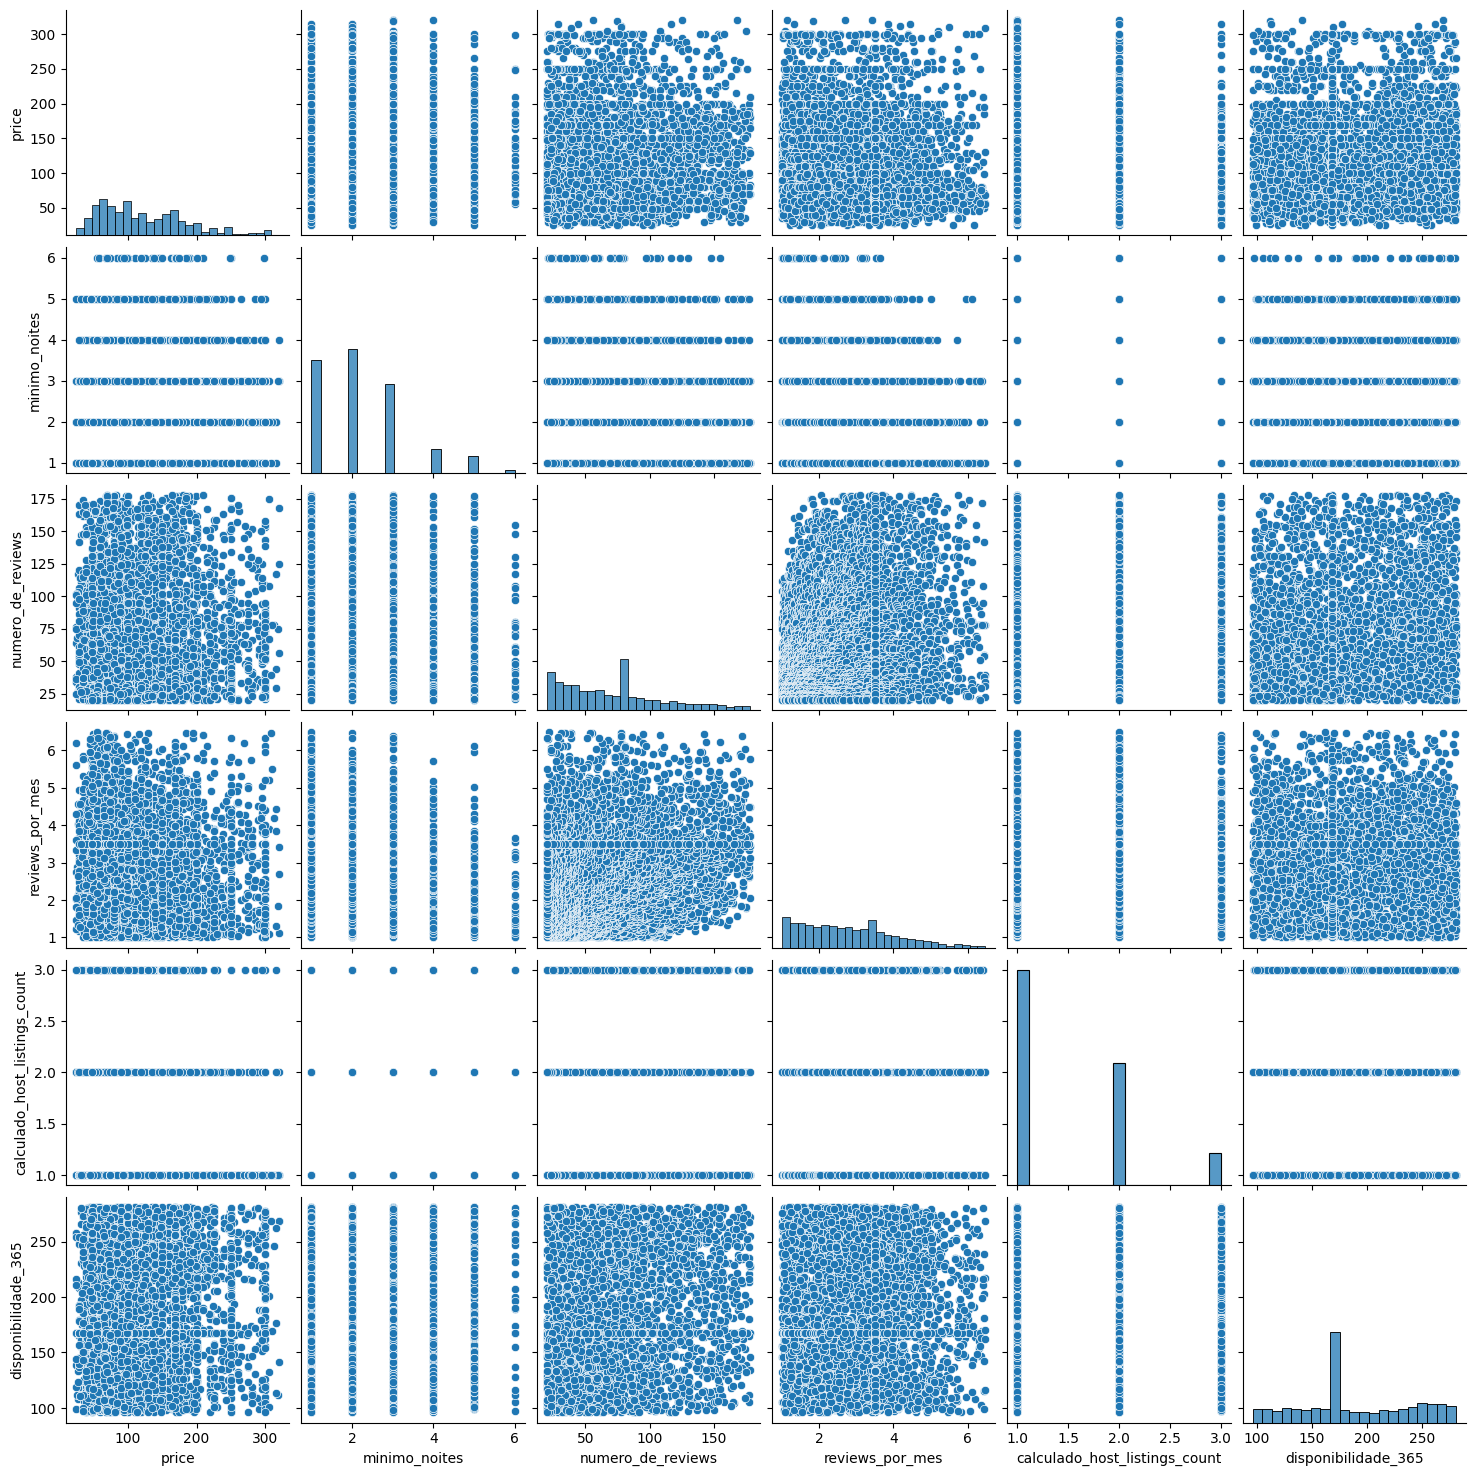

In [66]:
sns.pairplot(df_filtered_final)

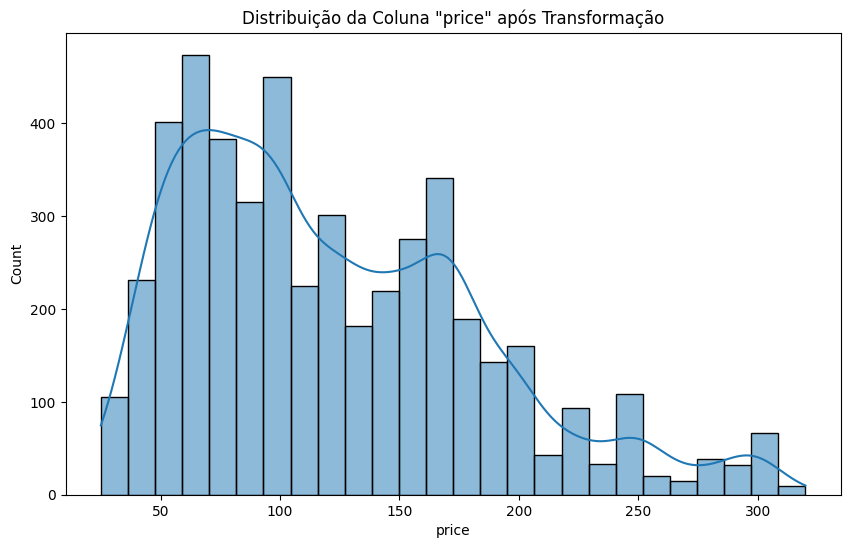

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_final['price'], kde=True)
plt.title('Distribuição da Coluna "price" após Transformação')

plt.show()

**TESTES DE HIPÓTESE**
---

---




**PRIMEIRA HIPÓTESE: A localização afeta o preço?**





In [68]:
df_filtered_final.groupby(["bairro_group"])["price"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
bairro_group,,
Manhattan,142.505572,136.5
Brooklyn,116.611868,100.5
Staten Island,94.075472,85.0
Queens,88.922240,70.0
Bronx,72.354331,63.0



Confirmado! <br>
O valor se dá por diversas razões, tais quais, vizinhança de maior custo,
localização estratégica no centro de Nova York, proximidade a grandes centros comerciais, facilidade de locomoção e transporte público. Se comparado com outras fontes de dados é possível ver algumas inconsistências. Exemplo disso é o bairro Queens aparecer após Staten Island, indicando que o tratamento não foi adequado. Porém isso não invalida a primeira hipótese.

---



**SEGUNDA HIPÓTESE: O tipo de casa/quarto influencia no preço?**




In [69]:
df_filtered_final.groupby(["room_type"])["price"].agg(["mean", "median"])

,mean,median
room_type,,
Entire home/apt,158.044403,150.0
Private room,78.329054,70.0
Shared room,58.957143,60.0


Confirmado! <br>
Casas e apartamentos possuem maior média de preços do que quartos privados. Quartos compartilhados possuem menor média de preços em comparação com quartos privados.

---



**TERCEIRA HIPÓTESE: O número mínimo de noites impacta o preço?**


In [70]:
df_filtered_final.groupby(["minimo_noites"])["price"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
minimo_noites,,
6.0,140.720930,145.0
4.0,137.807692,135.0
3.0,134.355004,125.0
5.0,129.711009,124.5
2.0,127.007380,115.0
1.0,102.028956,89.0


Confirmado! <br>
A quantidade de noites influencia diretamente no preço. Quanto mais noites maior a progressão de valor médio.

---



**QUARTA HIPÓTESE: O Número de reviews influencia no preço?**





In [71]:
df_filtered_final.groupby(["numero_de_reviews"])["price"].agg(["mean", "median"])

,mean,median
numero_de_reviews,,
20.0,111.977011,99.0
21.0,121.583333,112.5
22.0,111.600000,82.0
23.0,112.341463,90.0
24.0,124.184615,110.0
...,...,...
174.0,100.000000,70.0
175.0,201.250000,170.0
176.0,189.666667,180.0


O número de reviews não impacta significativamente no preço. <br>
É possível ver que existe uma variância de preços mesmo com reviews mais altas. Será necessário visualizar a dispersão.





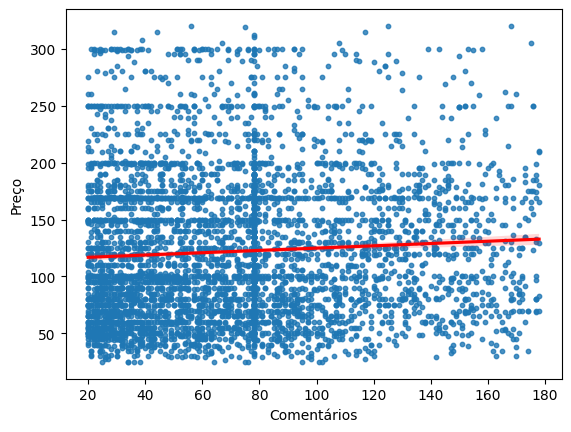

In [72]:
sns.regplot(x='numero_de_reviews', y='price', data=df_filtered_final, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel("Comentários")
plt.ylabel("Preço")

plt.show()


É possível ver que ainda existem valores mais dispersos, o que sinalisa a necessidade de um melhor tratamento. Mesmo com a necessidade de um tratamento mais adequado, é possível ver que o os comentários pouco impactam no preço, refutando a quarta hipótese.

---



**QUINTA HIPÓTESE: As reviews por mês influenciam no preço?**




In [73]:
df_filtered_final.groupby(["reviews_por_mes"])["price"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
reviews_por_mes,,,,
1.00,118.529412,120.0,35.0,215.0
1.01,114.045455,100.0,45.0,224.0
1.02,125.400000,73.0,40.0,299.0
1.03,121.500000,112.5,36.0,300.0
1.04,140.884615,146.0,55.0,299.0
...,...,...,...,...
6.43,72.000000,72.0,72.0,72.0
6.44,74.500000,74.5,50.0,99.0
6.45,150.000000,185.0,70.0,195.0


As reviews não impactam significativamente no preço. <br>
Existe uma variância de preços em reviews mais altas e mais baixas, que pode significar que a qualidade não reflete necessariamente no preço. Ou pode ser influência dos dados comprometidos.



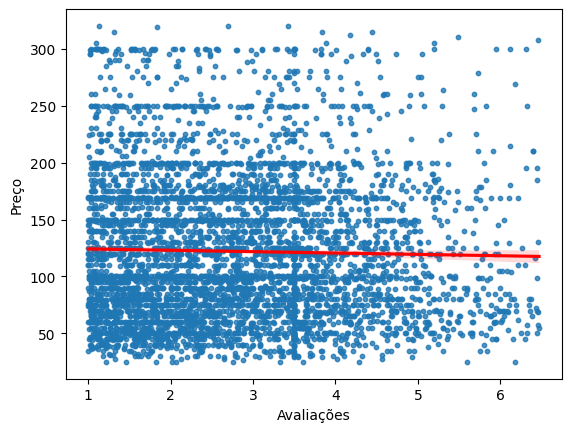

In [75]:
sns.regplot(x='reviews_por_mes', y='price', data=df_filtered_final, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel("Avaliações")
plt.ylabel("Preço")

plt.show()

Na visualização é possível ver que algumas reviews menores possuem maiores valores, portanto, isso não confirma a quinta hipótese.

---



**SEXTA HIPÓTESE:  O Número de comentários influencia na disponibilidade?**




In [76]:
df_filtered_final.groupby(["numero_de_reviews"])["disponibilidade_365"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
numero_de_reviews,,
173.0,252.888889,271.0
176.0,227.333333,250.0
134.0,224.222222,233.5
128.0,222.769231,239.0
132.0,222.562500,240.0
...,...,...
151.0,168.615385,168.0
38.0,167.278689,168.0
21.0,163.800000,166.5


O número de reviews a princípio tem um impacto significativo na disponibilidade. <br>
É possível ver um padrão de disponibilidade em quantidades maiores de reviews. Mesmo que alguns valores estejam distoando, é possível notar que existe um padrão progressivo linear.


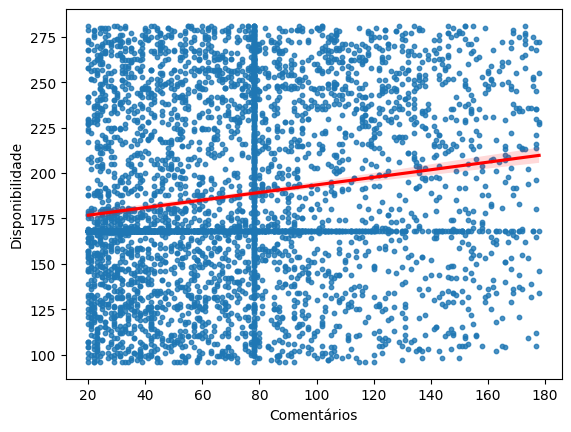

In [77]:
sns.regplot(x='numero_de_reviews', y='disponibilidade_365', data=df_filtered_final, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel("Comentários")
plt.ylabel("Disponibilidade")

plt.show()

Na visualização é possível ver uma correlação entre o número de avaliações e a disponibilidade, ao menos em boa parte dos dados. O que pode significar em alguns casos que imóveis são mais avaliados pela maior disponibilidade para locação. <br>
Uma possibilidade em relação ao número de avaliações seria a maior chance de que essas avaliações sejam reclamações, o que impacta diretamente na disponibilidade. Isso justificaria uma maior disponibilidade em imóveis com maior número de avaliações/comentários. <br>
Se torna necessário o comparativo da distribuição de revires ao mês pela quantidade total de reviews. Pela distribuição do gráfico, é possível confirmar a sexta hipótese.


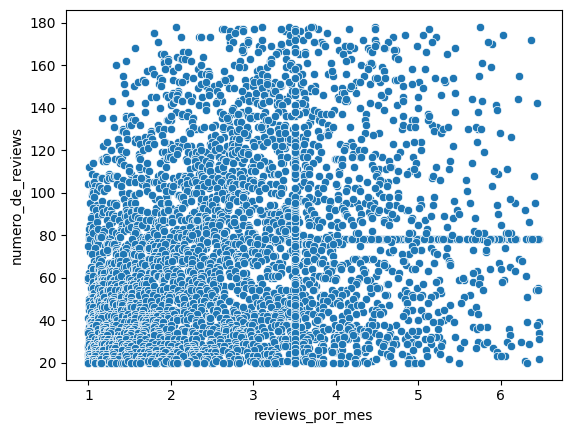

In [78]:
sns.scatterplot(x='reviews_por_mes', y='numero_de_reviews', data=df_filtered_final)
plt.show()

A dispersão da quantidade de reviews pelas  reviews por mês está bem distribuido, ao menos até a metade do gráfico. É possível que ainda existam outliers que influenciem nos dados mais dispersos.


---



**SÉTIMA HIPÓTESE:  As reviews por mês influenciam na disponibilidade?**





In [79]:
df_filtered_final.groupby(["reviews_por_mes"])["disponibilidade_365"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
reviews_por_mes,,
6.42,280.0,280.0
6.15,278.0,278.0
5.64,275.0,275.0
5.29,274.0,274.0
4.87,273.5,273.5
...,...,...
5.36,119.5,119.5
5.79,118.0,118.0
5.54,109.0,109.0


As reviews por mês a princípio impactam na disponibilidade. É possível constatar uma progressão linear. É necessário avaliar em gráfico.

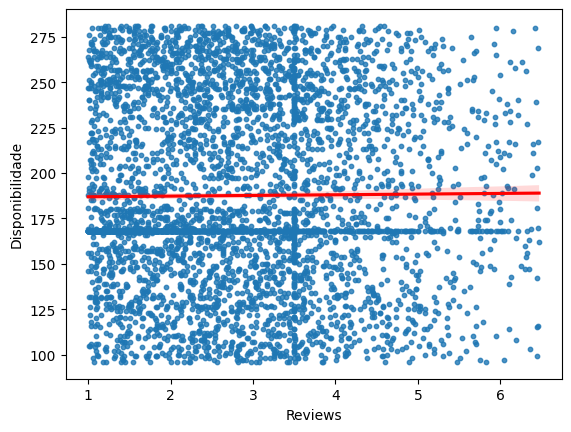

In [82]:
sns.regplot(x='reviews_por_mes', y='disponibilidade_365', data=df_filtered_final, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel("Reviews")
plt.ylabel("Disponibilidade")

plt.show()

É possível visualizar que as reviews impactam diretamente na vacância ou disponibilidade dos imóveis. <br>
Porém pode ser necessário uma nova filtragem dos dados. É possível ver que existem imóveis menos avaliados que apresentam disponibilidade alta. Provavelmente pelos mesmos motivos citados na sexta hipótese. A dispersão em alguns setores do gráfico pode estar interferindo na confiabilidade da análise.






**CONCLUSÕES**
---


---





**1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**





In [84]:
df_filtered_final.groupby(["bairro_group"])["price"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
bairro_group,,
Manhattan,142.505572,136.5
Brooklyn,116.611868,100.5
Staten Island,94.075472,85.0
Queens,88.922240,70.0
Bronx,72.354331,63.0




A escolha do bairro para locação/compra depende exclusivamente da escolha do cliente. Podemos considerar as seguintes possibilidades:
*   Se for possível desembolsar mais, Manhattan é a melhor escolha.
*   Se o preço alto for um problema, é possível considerar o Brooklyn como zona com boa acessibilidade e valorização.
*   Staten Island e Queens são outras opções economicas, porém staten island é mais distante de manhattan, o que pode ser apelativo para quem busca mais tranquilidade e distância de grandes centros urbanos.
*   Se o objetivo for economizar Bronx é a escolha mais viável, porém carece de acessibilidade e infraestrutura se comparado a outros.

OBS.: As informações extras não constam no dataset e foram retiradas de outras fontes, as quais confirmam algumas inconsistências nos dados.


---



**2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**





In [85]:
df_filtered_final.groupby(["minimo_noites"])["price"].agg(["mean", "median"]).sort_values(by=["mean", "median"], ascending=[False, False])

,mean,median
minimo_noites,,
6.0,140.720930,145.0
4.0,137.807692,135.0
3.0,134.355004,125.0
5.0,129.711009,124.5
2.0,127.007380,115.0
1.0,102.028956,89.0


O mínimo de noites impacta diretamente no preço, como confirmado na hipótese número 3.

---




**Existe algum padrão no texto do nome do local para lugares de mais alto valor?**





In [86]:
df_filtered_final.groupby(["bairro_group"])["price"].agg(["mean", "median", "min", "max"]).sort_values(by=["mean", "median", "min", "max"], ascending=[False, False, False, False])

,mean,median,min,max
bairro_group,,,,
Manhattan,142.505572,136.5,25.0,320.0
Brooklyn,116.611868,100.5,25.0,320.0
Staten Island,94.075472,85.0,25.0,245.0
Queens,88.922240,70.0,25.0,300.0
Bronx,72.354331,63.0,25.0,169.0


Sim, pois existe uma tendência na correlação entre valores e nomes de bairros
O que pode indicar áreas de mais alto valor. Nesse caso, os valores mais altos podem ser devido a influência de bairros mais tradicionais e de prestígio. Em geral é possível que bairros mais caros tendem a ser associados a nomes com longa hitória de valorização e exclusividade.


---



**3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**






Como o objetivo do desafio é prever o preço de imóveis, que se tratam de dados com valores contínuos, o problema em questão se trata de uma regressão. O modelo escolhido para o desafio se trata de um modelo Random Forest (RF), que combina árvores de decisão. Mesmo assim, devido a natureza dos dados atuais, o modelo pode não ser a melhor escolha.


*   Prós do Modelo RF:
  1. Melhor desempenho se comparado ao modelo de árvore de decisão
  2. Menos tendência a sobreajustes (overfitting)
  3. Lida bem com variáveis categóricas e contínuas

*   Contras do Modelo RF:
  1. Maior dificuldade de se interpretar
  2. Mais lento na previsão que modelos simples



Medidas de Performance Escolhidas:

1. Erro Absoluto Médio (MAE)
Para quantificar a média das diferenças entre os valores reais e previstos, já que quanto menos o MAE, melhor o modelo.
2. Erro Quadrático Médio (MSE):
Para calcular a média dos quadrados das diferenças entre os valores reais e previstos, penalizando erros maiores, tendo em vista que o Dataframe de testes possuia variação nos dados.
3. Coeficiente de Determinação (R²):
Calcula a proporção da variância total dos dados, variando entre 0 e 1, ou seja, quanto mais proximo de 1, melhor o modelo.


---



**EXPORTANDO O DATAFRAME FILTRADO PARA TREINAMENTO DE MODELOS PREDITIVOS**



In [70]:
df_filtered_final.to_csv("df_price_train.csv", index=False)

In [71]:
from google.colab import files
files.download("df_price_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODELO DE MACHINE LEARNING RANDOM FOREST (RF)**
---

---





Inicialmente a ideia era de se usar um modelo de regressão linear simples para prever preços futuros. Porém, como ainda existem outliers que passaram a filtragem, é necessário o uso de um modelo mais robusto que não se deixe ser afetado por outliers. Esse modelo é mais robusto que o modelo de regressão linear simples, porém ele ainda é falho a outliers. Portanto os resultados podem não ser os mais confiáveis, sendo a necessidade de se utiliar um modelo com maior robustez a outliers como o huber regression. Outra alternativa é o uso de um dataset mais bem tratado e sem outliers.


In [73]:
df_filtered_final.head()

,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
2,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,78.0,4.64,1.0,194.0
6,Manhattan,Hell's Kitchen,Private room,79.0,2.0,78.0,3.47,1.0,220.0
8,Manhattan,Chinatown,Entire home/apt,150.0,1.0,160.0,1.33,2.0,188.0
30,Manhattan,Harlem,Private room,52.0,2.0,88.0,1.42,1.0,255.0
38,Manhattan,Lower East Side,Shared room,40.0,1.0,78.0,1.81,2.0,188.0


**IMPORTANDO DO SCIKITLEARN**





In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**IMPORTANDO O DATAFRAME DE TESTES**





In [75]:
df_filtered_final = pd.read_csv("df_price_train.csv")

In [76]:
# Separando as colunas em numéricas e categóricas
cols_num = ["minimo_noites", "numero_de_reviews", "reviews_por_mes",
            "calculado_host_listings_count", "disponibilidade_365"]
cols_ctg = ["bairro_group", "bairro", "room_type"]

# Criando dummies para variáveis categóricas
df_encoded = pd.get_dummies(df_filtered_final, columns=cols_ctg, drop_first=True)

# Separar x e y
x = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

# Normalizar os dados numéricos
scaler = StandardScaler()
x[cols_num] = scaler.fit_transform(x[cols_num])

In [77]:
# Dividir em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(x_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 31.53
Erro quadrático médio (MSE): 1878.10
Coeficiente de determinação (R²): 0.55




---



**TESTE 1**




In [78]:
# Criando um DataFrame com os dados do novo imóvel
new_house_price = pd.DataFrame([{
    "bairro_group": "Manhattan",
    "bairro": "Midtown",
    "room_type": "Entire home/apt",
    "minimo_noites": 1,
    "numero_de_reviews": 45,
    "reviews_por_mes": 0.38,
    "calculado_host_listings_count": 2,
    "disponibilidade_365": 355
}])

# Aplicando o mesmo pré-processamento (One-Hot Encoding)
new_house_price = pd.get_dummies(new_house_price)
new_house_price = new_house_price.reindex(columns=x.columns, fill_value=0)

# Fazer a previsão
preco_estimado = rf.predict(new_house_price)[0]
print(f"Preço estimado: ${preco_estimado:.2f}")

Preço estimado: $190.18




---



**COMPARANDO COM UM MODELO DE REGRESSÃO LINEAR SIMPLES**




In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [80]:
# Separando as colunas em numéricas e categóricas
cols_num = ["minimo_noites", "numero_de_reviews", "reviews_por_mes",
            "calculado_host_listings_count", "disponibilidade_365"]
cols_ctg = ["bairro_group", "bairro", "room_type"]

# Criando dummies para variáveis categóricas
df_encoded = pd.get_dummies(df_filtered_final, columns=cols_ctg, drop_first=True)

# Separar x e y
x = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

# Normalizar os dados numéricos
scaler = StandardScaler()
x[cols_num] = scaler.fit_transform(x[cols_num])

In [81]:
# Dividir em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Linear
lr = LinearRegression()
lr.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = lr.predict(x_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 30.14
Erro quadrático médio (MSE): 1703.05
Coeficiente de determinação (R²): 0.59




---



**TESTE 2**



In [82]:
# Criando um DataFrame com os dados do novo imóvel
new_house_price = pd.DataFrame([{
    "bairro_group": "Manhattan",
    "bairro": "Midtown",
    "room_type": "Entire home/apt",
    "minimo_noites": 1,
    "numero_de_reviews": 45,
    "reviews_por_mes": 0.38,
    "calculado_host_listings_count": 2,
    "disponibilidade_365": 355
}])

# Aplicando o mesmo pré-processamento (One-Hot Encoding)
new_house_price = pd.get_dummies(new_house_price)
new_house_price = new_house_price.reindex(columns=x.columns, fill_value=0)

# Normalizar as variáveis numéricas (usando o mesmo scaler do treino)
new_house_price[cols_num] = scaler.transform(new_house_price[cols_num])

# Fazer a previsão usando o modelo de Regressão Linear
preco_estimado = lr.predict(new_house_price)[0]
print(f"Preço estimado: ${preco_estimado:.2f}")

Preço estimado: $198.51


**CONCLUSÃO DOS TESTES**
---
---


Mesmo que o dataframe ainda possua outliers que alterem o resultado final da previsão. É possível ver que o modelo random forest possui mais robustes aos outliers se comparado ao modelo de regressão linear mais simples.
